In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### Data Wrangling

In [2]:
Y2024_input_file = 'C:/Users/sahit/Desktop/MSDS/Advnaced_Python/2024_QS_World_University_Rankings.xlsx'
Y2024_df = pd.read_excel(Y2024_input_file,header=[1, 2, 3])

In [3]:
Y2024_df.fillna(0, inplace=True)

In [4]:
Y2024_df[('Academic Reputation','RANK','ar rank')] = \
    Y2024_df[('Academic Reputation','RANK','ar rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('Employer Reputation','RANK','er rank')] = \
    Y2024_df[('Employer Reputation','RANK','er rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('Faculty Student','RANK','fsr rank')] = \
    Y2024_df[('Faculty Student','RANK','fsr rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('Citations per Faculty','RANK','cpf rank')] = \
    Y2024_df[('Citations per Faculty','RANK','cpf rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('International Faculty','RANK','ifr rank')] = \
    Y2024_df[('International Faculty','RANK','ifr rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('International Students','RANK','isr rank')] = \
    Y2024_df[('International Students','RANK','isr rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('International Research Network','RANK','irn rank')] = \
    Y2024_df[('International Research Network','RANK','irn rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('Employment Outcomes','RANK','ger rank')] = \
    Y2024_df[('Employment Outcomes','RANK','ger rank')].apply(lambda x: str(x).replace('+',''))
Y2024_df[('Sustainability','Rank','SUS RANK')] = \
    Y2024_df[('Sustainability','Rank','SUS RANK')].apply(lambda x: str(x).replace('+',''))


In [5]:
Y2024_df[('Academic Reputation','RANK','ar rank')] = \
    Y2024_df[('Academic Reputation','RANK','ar rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('Employer Reputation','RANK','er rank')] = \
    Y2024_df[('Employer Reputation','RANK','er rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('Faculty Student','RANK','fsr rank')] = \
    Y2024_df[('Faculty Student','RANK','fsr rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('Citations per Faculty','RANK','cpf rank')] = \
    Y2024_df[('Citations per Faculty','RANK','cpf rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('International Faculty','RANK','ifr rank')] = \
    Y2024_df[('International Faculty','RANK','ifr rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('International Students','RANK','isr rank')] = \
    Y2024_df[('International Students','RANK','isr rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('International Research Network','RANK','irn rank')] = \
    Y2024_df[('International Research Network','RANK','irn rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('Employment Outcomes','RANK','ger rank')] = \
    Y2024_df[('Employment Outcomes','RANK','ger rank')].apply(lambda x: str(x).replace('=',''))
Y2024_df[('Sustainability','Rank','SUS RANK')] = \
    Y2024_df[('Sustainability','Rank','SUS RANK')].apply(lambda x: str(x).replace('=',''))


In [6]:
Y2024_df[('Academic Reputation','RANK','ar rank')] = \
    Y2024_df[('Academic Reputation','RANK','ar rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('Employer Reputation','RANK','er rank')] = \
    Y2024_df[('Employer Reputation','RANK','er rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('Faculty Student','RANK','fsr rank')] = \
    Y2024_df[('Faculty Student','RANK','fsr rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('Citations per Faculty','RANK','cpf rank')] = \
    Y2024_df[('Citations per Faculty','RANK','cpf rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('International Faculty','RANK','ifr rank')] = \
    Y2024_df[('International Faculty','RANK','ifr rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('International Students','RANK','isr rank')] = \
    Y2024_df[('International Students','RANK','isr rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('International Research Network','RANK','irn rank')] = \
    Y2024_df[('International Research Network','RANK','irn rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('Employment Outcomes','RANK','ger rank')] = \
    Y2024_df[('Employment Outcomes','RANK','ger rank')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('Sustainability','Rank','SUS RANK')] = \
    Y2024_df[('Sustainability','Rank','SUS RANK')].apply(lambda x: str(x).replace('-',''))
Y2024_df[('Overall','SCORE','Overall Score')] = \
    Y2024_df[('Overall','SCORE','Overall Score')].apply(lambda x: str(x).replace('-','0'))

In [7]:
# numerical_features_all = Y2024_df.drop([2024, 2023, 'Institution Name', 'Location', 'Classification'], axis=1)
numerical_features_all = Y2024_df
numerical_features_all.head()

2024          2023                              Institution Name  \
          RANK          RANK                            Unnamed: 2_level_1   
  rank display rank display2                                   institution   
0            1             1  Massachusetts Institute of Technology (MIT)    
1            2             2                       University of Cambridge   
2            3             4                          University of Oxford   
3            4             5                            Harvard University   
4            5             3                           Stanford University   

            Location                 Classification                        \
  Unnamed: 3_level_1        Location           SIZE FOCUS     RES. STATUS   
       location code        location           size focus research status   
0                 US   United States              M    CO       VH      B   
1                 UK  United Kingdom              L    FC       VH      A   
2                 UK  United Kingdom              L    FC       VH      A   
3                 US   United States              L    FC       VH      B   
4                 US   United States              L    FC       VH      B   

  Academic Reputation  ... International Faculty International Students  \
                SCORE  ...                  RANK                  SCORE   
             ar score  ...              ifr rank              isr score   
0               100.0  ...                    56                   88.2   
1               100.0  ...                    64                   95.8   
2               100.0  ...                   110                   98.2   
3               100.0  ...                   210                   66.8   
4               100.0  ...                    78                   51.2   

           International Research Network          Employment Outcomes  \
      RANK                          SCORE     RANK               SCORE   
  isr rank                      irn score irn rank           ger score   
0      128                           94.3       58               100.0   
1       85                           99.9        7               100.0   
2       60                          100.0        1               100.0   
3      223                          100.0        5               100.0   
4      284                           95.8       44               100.0   

           Sustainability                Overall  
      RANK          Score     Rank         SCORE  
  ger rank      SUS SCORE SUS RANK Overall Score  
0        4           95.2       51           100  
1        6           97.3       33          99.2  
2        3           97.8       26          98.9  
3        1           96.7       39          98.3  
4        2           94.4       63          98.1  

[5 rows x 28 columns]

In [8]:
# numerical_features_all.columns
new_columns = ['_'.join(map(str, col[:2])) for col in numerical_features_all.columns]
#new_columns
numerical_features_all.columns = new_columns

cols =[]
for col in numerical_features_all.columns:
    if ('SCORE' in col) or ('Institution' in col) or ('2024' in col)  or ('Location' in col) :
        cols.append(col)
print(cols)

Y2024_df_all = numerical_features_all

Y2024_df_all = Y2024_df_all[cols]
col_name = Y2024_df_all.columns.tolist()
col_name[0] = '2024_Rank'
col_name[1] = 'Institution'
col_name[2] = 'Location code'
Y2024_df_all.columns = col_name
Y2024_df_all.drop(Y2024_df_all.columns[3], axis=1, inplace=True)
Y2024_df_all['2024_Rank'] = Y2024_df_all['2024_Rank'].apply(lambda x: str(x).replace('=',''))
print(Y2024_df_all.head())

['2024_RANK', 'Institution Name_Unnamed: 2_level_1', 'Location_Unnamed: 3_level_1', 'Location_Location', 'Academic Reputation_SCORE', 'Employer Reputation_SCORE', 'Faculty Student_SCORE', 'Citations per Faculty_SCORE', 'International Faculty_SCORE', 'International Students_SCORE', 'International Research Network_SCORE', 'Employment Outcomes_SCORE', 'Overall_SCORE']
  2024_Rank                                   Institution Location code  \
0         1  Massachusetts Institute of Technology (MIT)             US   
1         2                       University of Cambridge            UK   
2         3                          University of Oxford            UK   
3         4                            Harvard University            US   
4         5                           Stanford University            US   

   Academic Reputation_SCORE  Employer Reputation_SCORE  \
0                      100.0                      100.0   
1                      100.0                      100.0   
2   

C:\Users\sahit\AppData\Local\Temp\ipykernel_7240\1202380026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y2024_df_all.drop(Y2024_df_all.columns[3], axis=1, inplace=True)
C:\Users\sahit\AppData\Local\Temp\ipykernel_7240\1202380026.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y2024_df_all['2024_Rank'] = Y2024_df_all['2024_Rank'].apply(lambda x: str(x).replace('=',''))


In [9]:
numerical_features_all

,2024_RANK,2023_RANK,Institution Name_Unnamed: 2_level_1,Location_Unnamed: 3_level_1,Location_Location,Classification_SIZE,Classification_FOCUS,Classification_RES.,Classification_STATUS,Academic Reputation_SCORE,...,International Faculty_RANK,International Students_SCORE,International Students_RANK,International Research Network_SCORE,International Research Network_RANK,Employment Outcomes_SCORE,Employment Outcomes_RANK,Sustainability_Score,Sustainability_Rank,Overall_SCORE
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,B,100.0,...,56,88.2,128,94.3,58,100.0,4,95.2,51,100
1,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,A,100.0,...,64,95.8,85,99.9,7,100.0,6,97.3,33,99.2
2,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,A,100.0,...,110,98.2,60,100.0,1,100.0,3,97.8,26,98.9
3,4,5,Harvard University,US,United States,L,FC,VH,B,100.0,...,210,66.8,223,100.0,5,100.0,1,96.7,39,98.3
4,5,3,Stanford University,US,United States,L,FC,VH,B,100.0,...,78,51.2,284,95.8,44,100.0,2,94.4,63,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1401+,0,University of Stavanger,NO,Norway,0,CO,0,0,7.2,...,0,0.0,0,26.3,489,0.0,0,0.0,0,0
1494,1401+,1201-1400,"University Politehnica of Timisoara, UPT",RO,Romania,M,FO,VH,A,4.0,...,701,2.9,701,1.3,701,8.5,701,1.0,701,0
1495,1401+,1201-1400,Western Washington University,US,United States,L,CO,HI,0,2.8,...,676,1.4,701,1.0,701,7.3,701,0.0,0,0
1496,1401+,0,Zürcher Hochschule Winterthur,CH,Switzerland,0,CO,0,0,5.7,...,0,0.0,0,1.7,701,0.0,0,0.0,0,0


In [10]:
Y2024_df_US = Y2024_df_all[Y2024_df_all['Location code'] == 'US']
Y2024_df_US.head()

,2024_Rank,Institution,Location code,Academic Reputation_SCORE,Employer Reputation_SCORE,Faculty Student_SCORE,Citations per Faculty_SCORE,International Faculty_SCORE,International Students_SCORE,International Research Network_SCORE,Employment Outcomes_SCORE,Overall_SCORE
0,1,Massachusetts Institute of Technology (MIT),US,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,100
3,4,Harvard University,US,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,98.3
4,5,Stanford University,US,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,98.1
9,10,"University of California, Berkeley (UCB)",US,100.0,100.0,20.5,99.9,92.2,63.9,92.4,98.7,90.4
10,11,University of Chicago,US,99.1,95.4,92.5,78.5,81.2,84.4,61.4,98.3,90.3


In [11]:
numerical_features_US = Y2024_df_US.iloc[:, 3:]

In [12]:
numerical_features_US

,Academic Reputation_SCORE,Employer Reputation_SCORE,Faculty Student_SCORE,Citations per Faculty_SCORE,International Faculty_SCORE,International Students_SCORE,International Research Network_SCORE,Employment Outcomes_SCORE,Overall_SCORE
0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,100
3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,98.3
4,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,98.1
9,100.0,100.0,20.5,99.9,92.2,63.9,92.4,98.7,90.4
10,99.1,95.4,92.5,78.5,81.2,84.4,61.4,98.3,90.3
...,...,...,...,...,...,...,...,...,...
1414,5.4,2.5,3.5,3.2,4.0,5.6,1.1,9.5,0
1415,4.0,2.8,8.1,0.0,0.0,0.0,0.0,9.6,0
1419,3.8,2.2,8.9,4.6,2.3,1.6,1.0,7.9,0
1420,3.7,3.5,5.9,5.2,4.9,2.5,1.1,10.9,0


In [13]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_US)

### Principal Component Analysis

In [14]:
n_components = 5
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(numerical_features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [15]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,7.574490,0.936831,0.092584,0.071560,-0.145727
1,7.195889,0.155634,-0.270432,0.281426,0.166061
2,7.159529,0.132611,-0.097033,0.853941,0.026017
3,6.414072,-0.909456,1.562638,-0.659091,-0.658696
4,6.451802,1.014486,-0.391902,-0.664153,-0.251405
...,...,...,...,...,...
194,-2.410691,-0.241222,-0.055589,-0.436984,-0.287635
195,-2.539158,-0.318246,-0.308392,-0.346446,-0.227968
196,-2.460909,-0.245561,-0.178049,-0.283942,-0.137497
197,-2.381565,-0.259013,-0.087604,-0.341068,-0.215074


In [16]:
# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i + 1}: {ratio:.4f}")

Explained variance ratio for each component:
PC1: 0.6856
PC2: 0.0906
PC3: 0.0838
PC4: 0.0567
PC5: 0.0363


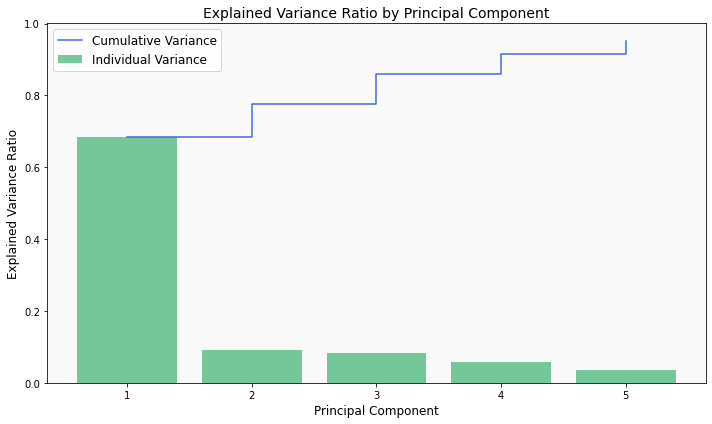

In [17]:
# Calculate cumulative explained variance
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 6))

# Plot individual explained variance as bar graph
plt.bar(range(1, n_components + 1), explained_variance_ratio, color='mediumseagreen', alpha=0.7, label='Individual Variance')

# Plot cumulative explained variance as step plot
plt.plot(range(1, n_components + 1), cumulative_explained_variance_ratio, 
         linestyle='-', drawstyle='steps-post', color='royalblue', markersize=8, label='Cumulative Variance')

# Highlighting maximum explained variance
# max_index = np.argmax(explained_variance_ratio)
# plt.scatter(max_index + 1, explained_variance_ratio[max_index], color='red', s=100, label='Max Variance')

# Adding labels and title
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio by Principal Component', fontsize=14)

# Setting x-ticks
plt.xticks(range(1, n_components + 1), fontsize=10)

# Adding a legend
plt.legend(fontsize=12)

# Grid and background styling
# plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

# Removing top and right spines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

In [18]:
components_df = pd.DataFrame(pca.components_, columns=numerical_features_US.columns)

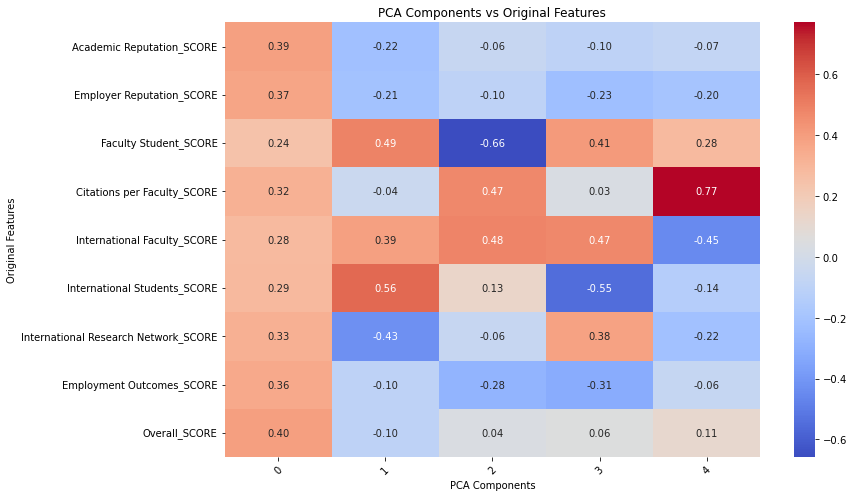

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(components_df.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Components vs Original Features')
plt.ylabel('Original Features')
plt.xlabel('PCA Components')
plt.xticks(rotation=45)
plt.show()

In [20]:
# This heatmap provides a visual representation of how each original feature contributes to each principal component. 
# Brighter colors indicate higher absolute values, suggesting stronger relationships between original features and 
# principal components. 
# You can interpret this heatmap to understand the structure and relationships within your data after dimensionality 
# reduction through PCA

### K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

For n_clusters = 3 The average silhouette_score is : 0.3723446480448273
For n_clusters = 4 The average silhouette_score is : 0.35040305947692935
For n_clusters = 5 The average silhouette_score is : 0.33620616148494653
For n_clusters = 6 The average silhouette_score is : 0.3550896127846456
Best number of clusters: 3


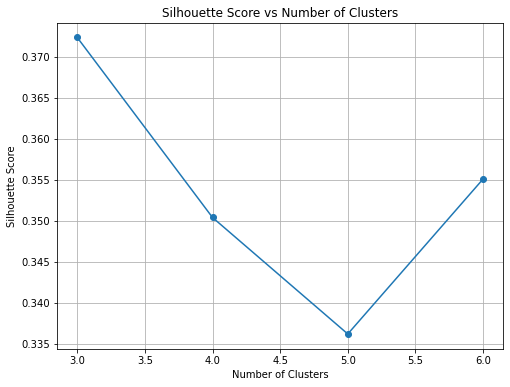

In [22]:
from sklearn.metrics import silhouette_score
# Assuming X is your feature matrix

# Define a range of cluster numbers to evaluate
range_n_clusters = [ 3, 4, 5, 6]

best_score = -1
best_n_clusters = -1

score =[]

for n_clusters in range_n_clusters:
    # Perform clustering
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(numerical_features_scaled)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(numerical_features_scaled, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Update best score and number of clusters if needed
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters
    
    score.append(silhouette_avg)

print("Best number of clusters:", best_n_clusters)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, score, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [23]:
n_clusters = 3

In [24]:
# Initialize KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

cluster_labels = kmeans.fit_predict(numerical_features_scaled)

numerical_features_US['Cluster'] = cluster_labels


In [25]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to display cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_features_US.columns[:-1])  # Assuming the last column is the cluster label


In [26]:
cluster_centers_df

,Academic Reputation_SCORE,Employer Reputation_SCORE,Faculty Student_SCORE,Citations per Faculty_SCORE,International Faculty_SCORE,International Students_SCORE,International Research Network_SCORE,Employment Outcomes_SCORE,Overall_SCORE
0,0.046099,-0.068903,0.157342,0.406075,0.450855,0.115633,0.472692,-0.041087,0.360594
1,2.118224,2.124661,1.021850,1.520486,1.070134,1.433408,1.451267,1.999555,1.949336
2,-0.619914,-0.548726,-0.384790,-0.681683,-0.584522,-0.473083,-0.704658,-0.531494,-0.772403


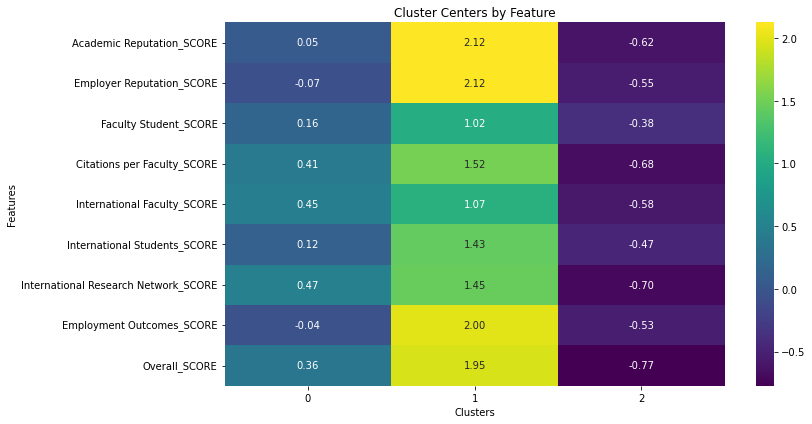

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cluster_centers_df contains the cluster centers DataFrame

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(cluster_centers_df.transpose(), cmap='viridis', annot=True, fmt=".2f")

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Features')
plt.title('Cluster Centers by Feature')

# Show plot
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()


In [28]:
# Centroids of each cluster in PCA space
centroids = kmeans.cluster_centers_[:, :2]  # Considering only the first two principal components
for i, centroid in enumerate(centroids):
    print(f'Centroid of Cluster {i + 1}: PC1={centroid[0]}, PC2={centroid[1]}')


Centroid of Cluster 1: PC1=0.046098961042105986, PC2=-0.06890331952831617
Centroid of Cluster 2: PC1=2.1182242398270343, PC2=2.124661110344021
Centroid of Cluster 3: PC1=-0.6199137921515672, PC2=-0.5487264722221898


### Borda Rank aggregation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [30]:
# Calculate Borda count scores for each university and each criterion
borda_counts = Y2024_df_all.iloc[:, :2].copy()

for criterion in Y2024_df_all.columns[2:]:
    borda_scores = Y2024_df_all[criterion].count() - Y2024_df_all[criterion].rank(method='first')
    borda_counts[criterion + '_Borda_Count'] = borda_scores

borda_counts['Total_Borda_Count'] = borda_counts.sum(axis=1)

# Rank universities based on aggregate Borda count scores
final_ranking = borda_counts.sort_values(by='Total_Borda_Count')
final_ranking = final_ranking.reset_index(drop=True)
final_ranking['Borda_Rank'] = final_ranking.index + 1
final_ranking = final_ranking.iloc[:,[1,0,-1]]

print(final_ranking.head(20))


                                          Institution 2024_Rank  Borda_Rank
0                             University of Cambridge         2           1
1                                University of Oxford         3           2
2                             Imperial College London         6           3
3                                 Stanford University         5           4
4                                  Harvard University         4           5
5                                                 UCL         9           6
6                          University of Pennsylvania        12           7
7                            Johns Hopkins University        28           8
8                                     Yale University        16           9
9                                 Columbia University        23          10
10                        The University of Edinburgh        22          11
11             National University of Singapore (NUS)         8          12
12          

C:\Users\sahit\AppData\Local\Temp\ipykernel_7240\3909262576.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  borda_counts['Total_Borda_Count'] = borda_counts.sum(axis=1)


In [32]:
from IPython.display import display, HTML

# Sort the DataFrame by 2024 rank in ascending order
sorted_df = final_ranking.head(20)

# print(sorted_df)

# Style the DataFrame for better display
styled_df = sorted_df.style.set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
    .background_gradient(cmap='coolwarm')

# Display the styled DataFrame
display(HTML(styled_df.render()))

C:\Users\sahit\AppData\Local\Temp\ipykernel_7240\1240759433.py:14: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_df.render()))


,Institution,2024_Rank,Borda_Rank
0,University of Cambridge,2,1
1,University of Oxford,3,2
2,Imperial College London,6,3
3,Stanford University,5,4
4,Harvard University,4,5
5,UCL,9,6
6,University of Pennsylvania,12,7
7,Johns Hopkins University,28,8
8,Yale University,16,9
9,Columbia University,23,10
